In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sale.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no


In [4]:
data.shape

(400, 6)

In [5]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'satisfied '],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   satisfied        400 non-null    object
dtypes: int64(4), object(2)
memory usage: 18.9+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
satisfied          0
dtype: int64

In [9]:
data['satisfied '].value_counts()

yes    300
no     100
Name: satisfied , dtype: int64

<AxesSubplot: xlabel='satisfied ', ylabel='count'>

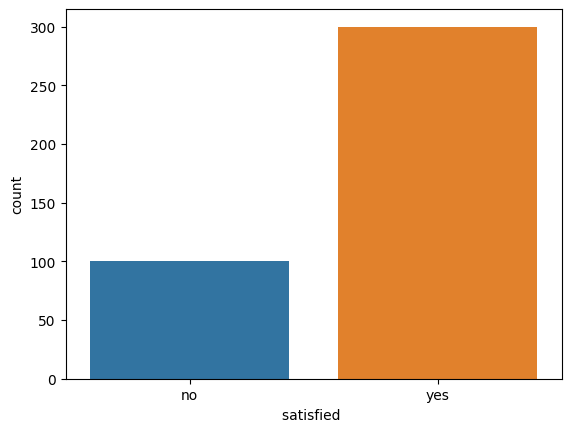

In [10]:
sns.countplot(x=data['satisfied '])

Dataset is Unbalanced

In [11]:
data.select_dtypes(include='object').columns

Index(['Gender', 'satisfied '], dtype='object')

## Labeling Categorical Variables to Numerical

In [12]:
from sklearn.preprocessing import LabelEncoder

lbn = LabelEncoder()

In [13]:
data['Gender'] = lbn.fit_transform(data['Gender'])
data['satisfied '] = lbn.fit_transform(data['satisfied '])

In [14]:
data.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [15]:
data['satisfied '].value_counts()

1    300
0    100
Name: satisfied , dtype: int64

1 --> Yes

0 --> No

## Under Sampling

In [16]:
Yes_data = data[data['satisfied ']==1]
No_data = data[data['satisfied ']==0]

In [17]:
Yes_data.shape, No_data.shape

((300, 6), (100, 6))

In [18]:
Yes_sample = Yes_data.sample(n=100)

In [19]:
Yes_sample.shape

(100, 6)

In [20]:
new_data = pd.concat([Yes_sample, No_data], axis=0)

In [21]:
new_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
105,15801658,1,21,72000,0,1
249,15753102,0,35,97000,1,1
257,15794493,1,40,57000,0,1
278,15613014,0,52,38000,1,1
127,15745232,1,26,32000,0,1


In [22]:
new_data['satisfied '].value_counts()

1    100
0    100
Name: satisfied , dtype: int64

## Splitting Features and Target Variables

In [23]:
x = new_data.drop('satisfied ', axis=1)
y = new_data['satisfied ']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [26]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [29]:
confusion_matrix(y_test, y_pred)

array([[11,  5],
       [ 7, 17]], dtype=int64)

In [30]:
print(f'Accuracy : {accuracy_score(y_test, y_pred)*100}%')

Accuracy : 70.0%
